In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.shape

(200, 5)

In [9]:
# We don't have any null values 
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.duplicated().sum()

0

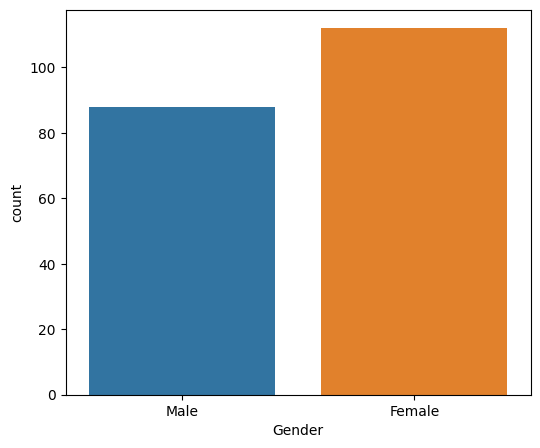

In [11]:
plt.figure(figsize = (6,5))
sns.countplot(x= 'Gender' ,  data = df )
plt.show()

([<matplotlib.patches.Wedge at 0x792ded45f490>,
 [Text(-0.22485758633183298, 1.1787446991902115, 'Female'),
  Text(0.20611945413751367, -1.080515974257694, 'Male')],
 [Text(-0.1311669253602359, 0.6876010745276234, '56%'),
  Text(0.11242879316591654, -0.5893723495951058, '44%')])

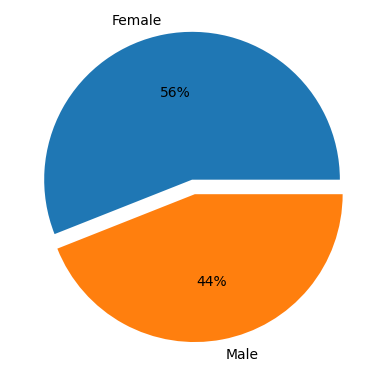

In [12]:
plt.pie(df['Gender'].value_counts(), labels=['Female', 'Male'], explode=[0.1, 0], autopct='%.0f%%')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

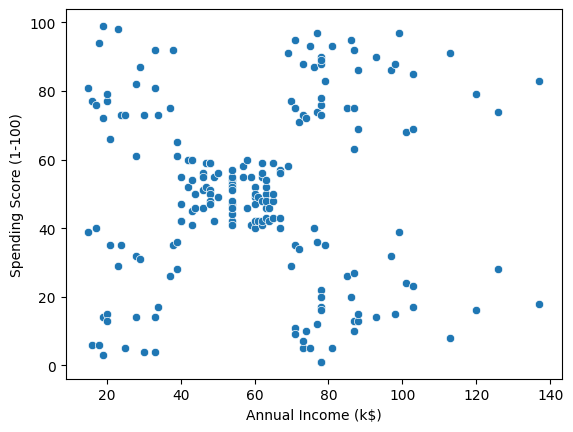

In [13]:
 
sns.scatterplot(x = 'Annual Income (k$)' , y= 'Spending Score (1-100)' , data = df)

In [14]:
new_df = df.drop(['CustomerID'] , axis = 1)

In [15]:
new_df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

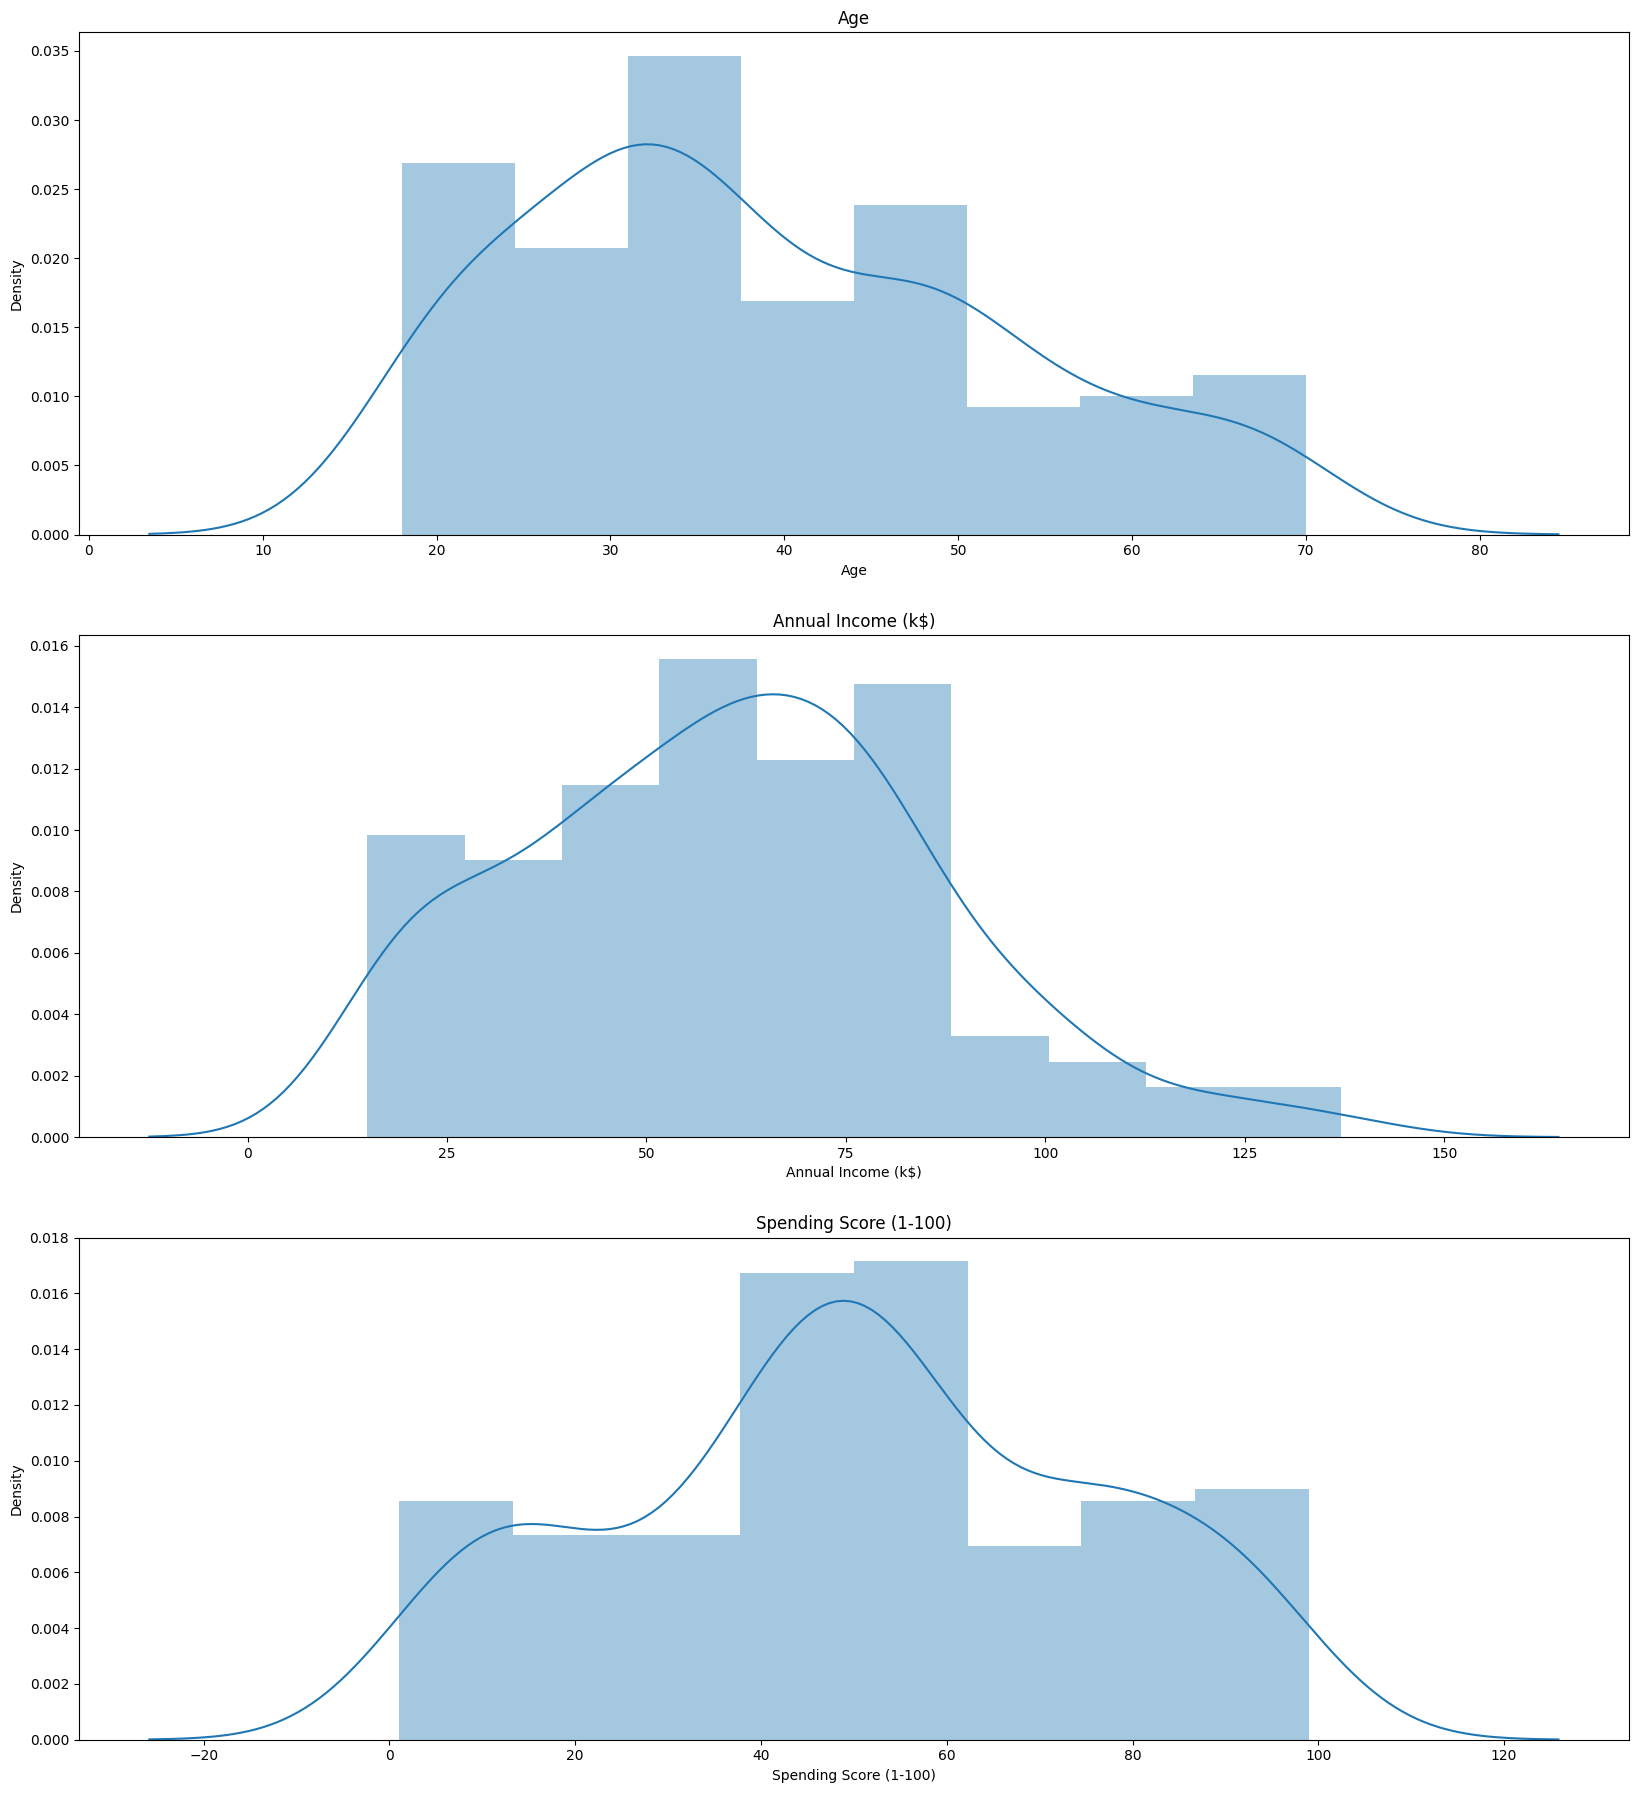

In [16]:
fig = plt.figure(figsize=(20, 30))

for i, col in enumerate(new_df.columns):
    if new_df[col].dtype != 'object':
        ax = plt.subplot(4, 1, i+1)
        sns.distplot(new_df[col] , ax = ax )
        plt.title(col)


plt.show()

Text(0.5, 1.0, 'Scatter plot of Spending Score vs. Income by Gender')

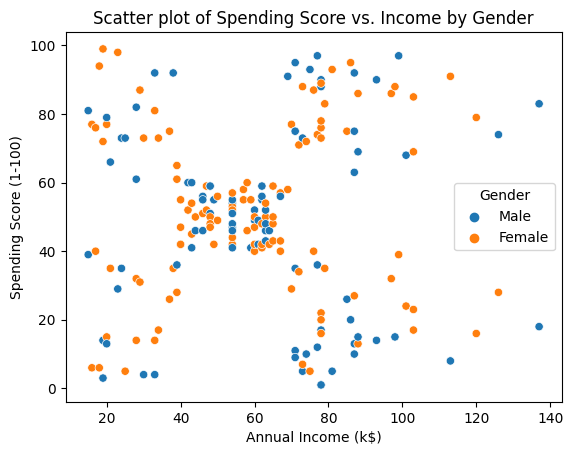

In [17]:
sns.scatterplot(x = 'Annual Income (k$)' , y= 'Spending Score (1-100)' , hue = 'Gender' , data = df)
plt.title('Scatter plot of Spending Score vs. Income by Gender')

<Figure size 700x700 with 0 Axes>

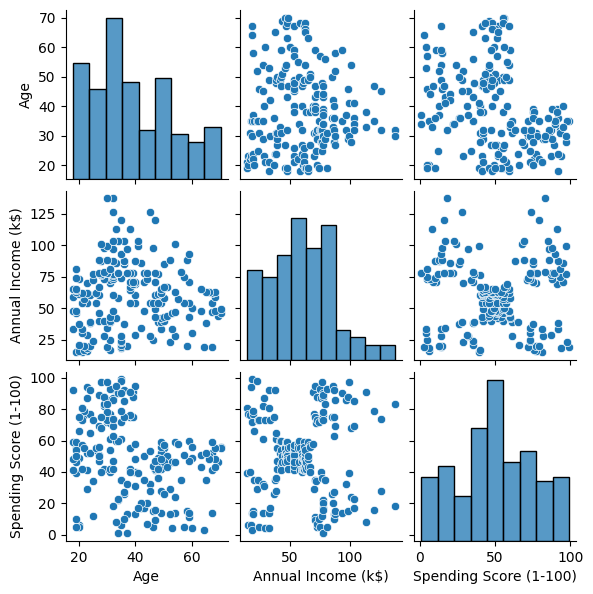

In [18]:
plt.figure(figsize = (7,7))
sns.pairplot(df.drop(['CustomerID'], axis = 1) , height = 2)
plt.show()


<Axes: xlabel='Gender', ylabel='Age'>

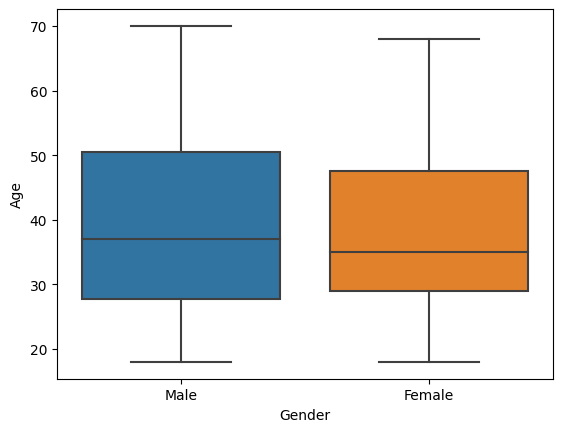

In [19]:
sns.boxplot(x= 'Gender' , y='Age' , data = df)

<Figure size 700x700 with 0 Axes>

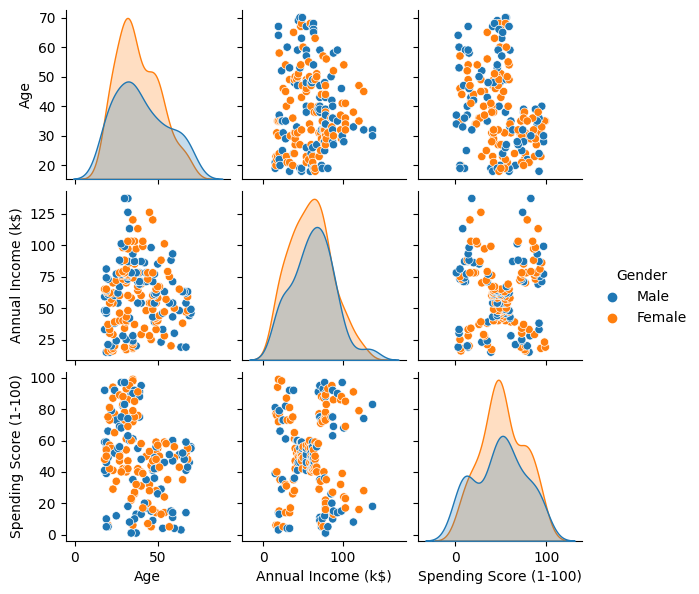

In [20]:
plt.figure(figsize = (7,7))
sns.pairplot(df.drop(['CustomerID'], axis = 1) ,hue='Gender', height = 2)
plt.show()

Coorelation Matrix

In [21]:
df['Gender'] = df['Gender'].map({'Male' : 0 , "Female" : 1 })

In [22]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


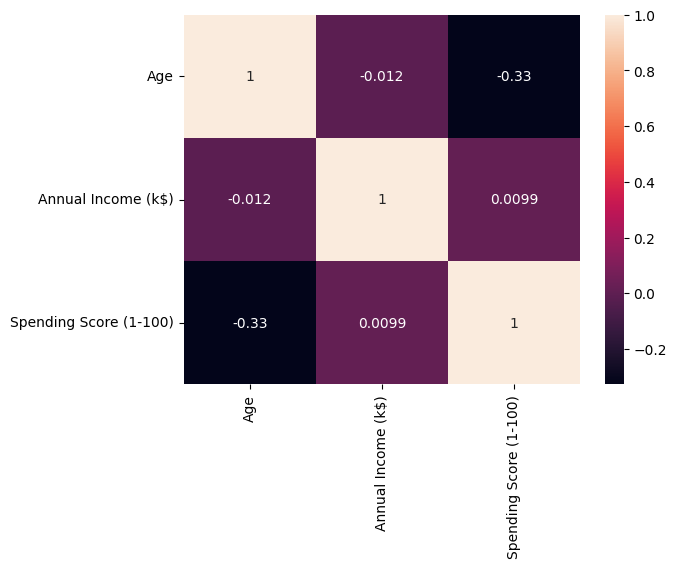

In [23]:

sns.heatmap(df.drop(['CustomerID' , 'Gender'] ,axis = 1  ).corr(), annot = True)
plt.show()


Conclusions 
1. Spending Score (1-100):

Interestingly, folks in the 20 to 30 age range seem to have quite the knack for spending, with noticeably high spending habits.
Moving on to the 30 to 40 age group, we see a mix of spending extremes. Meanwhile, customers in the 40 to 70 age bracket tend to display more conservative spending habits.

2. Annual Income (k$):

No matter the age, our dataset shows a spread of annual income across the board. Gender doesn't seem to play a significant role in this aspect.

3.Annual Income (k$) vs Spending Score (1-100):

Looking at the relationship between annual income and spending habits, we can spot five distinct customer groups.
For those with annual incomes between 0 to 40k, there are two main clusters based on spending score: one with scores between 0 to 40 and another with scores between 60 to 100.
In the middle ground, customers with incomes ranging from 40 to 70k tend to have spending scores between 40 to 60.
Lastly, the higher earners, with incomes from 70 to 140k, split into two groups: one with spending scores from 0 to 40 and another with scores from 60 to 100.


In [24]:
df.skew()

CustomerID                0.000000
Gender                   -0.243578
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

Data is fairly symmertrical 

Data Preproessing 

In [25]:
df_copy = df.copy()

In [26]:
df_copy.drop(['CustomerID'] , axis = 1 , inplace = True)

In [27]:
scaled_df = scaler.fit_transform(df_copy)

Standardization (Z-score normalization): This method scales the data to have a mean of 0 and a standard deviation of 1.

**PCA**

Text(0, 0.5, 'inertia')

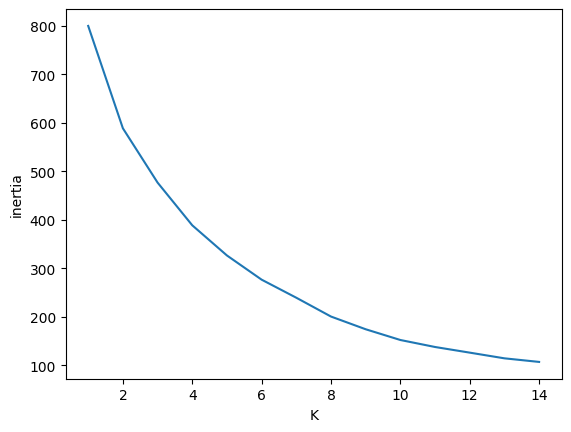

In [28]:
inertia = []
values = range(1,15)
for i in range(1,15) :
    kmeans_model = KMeans(n_clusters = i)
    kmeans_model.fit_predict(pd.DataFrame(scaled_df))
    inertia_value = kmeans_model.inertia_
    inertia.append(inertia_value)

plt.plot(values ,  inertia)
plt.xlabel('K')
plt.ylabel('inertia')

    

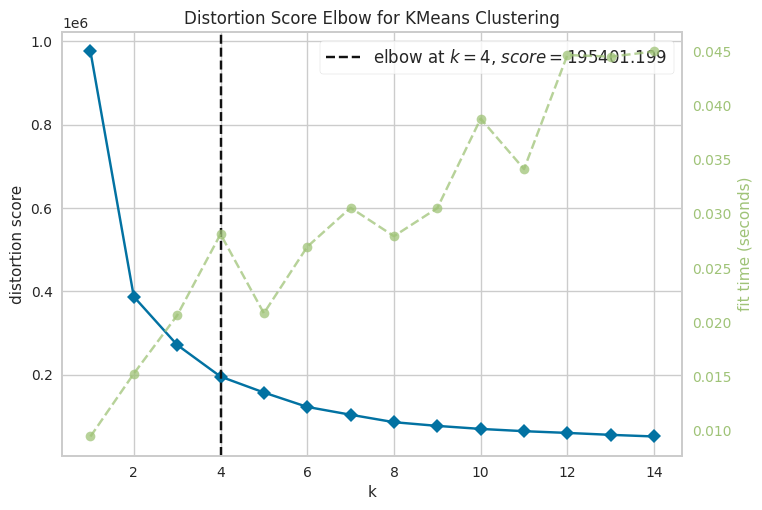

In [29]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=22)
visualizer = KElbowVisualizer(model, k=(1,15))
visualizer.fit(df)
visualizer.show()
plt.show()

In [30]:
pca = PCA(n_components = 2 )
pca_model = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(pca_model , columns = ['PCA1' , 'PCA2'])
pca_df

,PCA1,PCA2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483
...,...,...
195,-1.179572,1.324568
196,0.672751,1.221061
197,-0.723719,2.765010
198,0.767096,2.861930


Hyperparameter Tuning :-
Elbow Method 

In [31]:
kmeans_model = KMeans(n_clusters =4 )
kmeans_model_labels = kmeans_model.fit_predict(scaled_df)
pca_df_kmeans = pd.concat([pca_df , pd.DataFrame({'Clusters' : kmeans_model_labels})] , axis = 1 )

<Axes: xlabel='PCA1', ylabel='PCA2'>

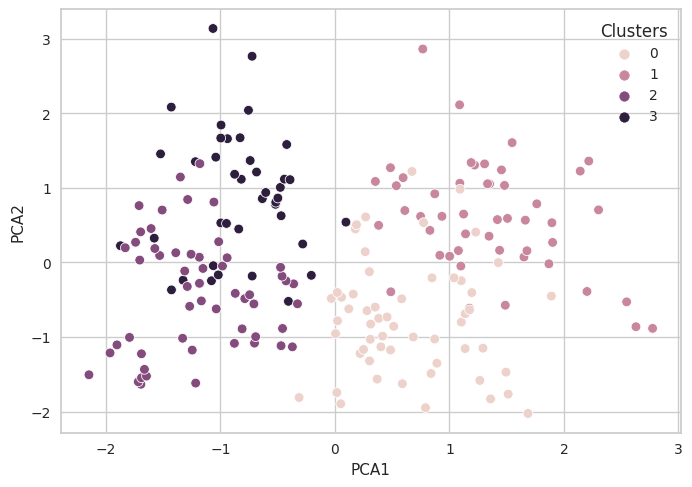

In [32]:
sns.scatterplot(x = 'PCA1' , y= 'PCA2', hue = 'Clusters' , data =pca_df_kmeans )


In [33]:
cluster_df = pd.concat([df , pd.DataFrame({'Clusters' : kmeans_model.labels_})] , axis =1   )

cluster_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,0,19,15,39,3
1,2,0,21,15,81,3
2,3,1,20,16,6,0
3,4,1,23,16,77,2
4,5,1,31,17,40,0
...,...,...,...,...,...,...
195,196,1,35,120,79,2
196,197,1,45,126,28,0
197,198,0,32,126,74,3
198,199,0,32,137,18,1


In [34]:
cluster_df[cluster_df['Clusters'] == 0 ]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
2,3,1,20,16,6,0
4,5,1,31,17,40,0
6,7,1,35,18,6,0
12,13,1,58,20,15,0
16,17,1,35,21,35,0
22,23,1,46,25,5,0
24,25,1,54,28,14,0
26,27,1,45,28,32,0
28,29,1,40,29,31,0
34,35,1,49,33,14,0


In [35]:
cluster_df[cluster_df['Clusters'] == 1 ]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
8,9,0,64,19,3,1
10,11,0,67,19,14,1
14,15,0,37,20,13,1
18,19,0,52,23,29,1
20,21,0,35,24,35,1
30,31,0,60,30,4,1
32,33,0,53,33,4,1
42,43,0,48,39,36,1
53,54,0,59,43,60,1
55,56,0,47,43,41,1


In [36]:
cluster_df[cluster_df['Clusters'] == 2 ]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
3,4,1,23,16,77,2
5,6,1,22,17,76,2
7,8,1,23,18,94,2
9,10,1,30,19,72,2
11,12,1,35,19,99,2
13,14,1,24,20,77,2
19,20,1,35,23,98,2
29,30,1,23,29,87,2
31,32,1,21,30,73,2
35,36,1,21,33,81,2


In [37]:
cluster_df[cluster_df['Clusters'] == 3]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,0,19,15,39,3
1,2,0,21,15,81,3
15,16,0,22,20,79,3
17,18,0,20,21,66,3
21,22,0,25,24,73,3
23,24,0,31,25,73,3
25,26,0,29,28,82,3
27,28,0,35,28,61,3
33,34,0,18,33,92,3
41,42,0,24,38,92,3


<Axes: xlabel='Clusters', ylabel='count'>

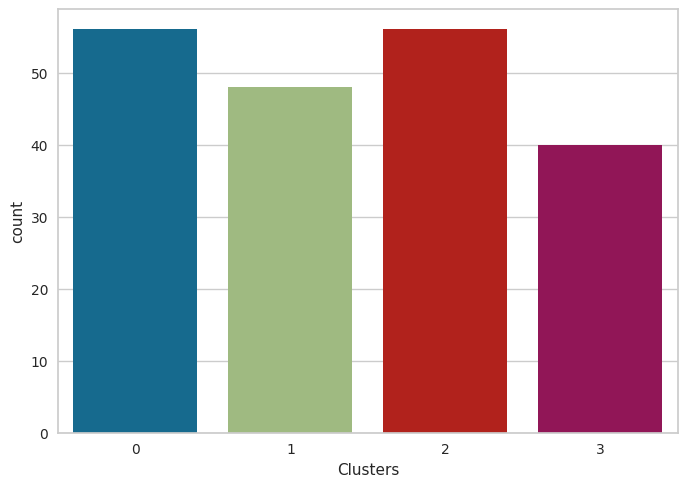

In [38]:
sns.countplot(x= 'Clusters' , data = cluster_df)

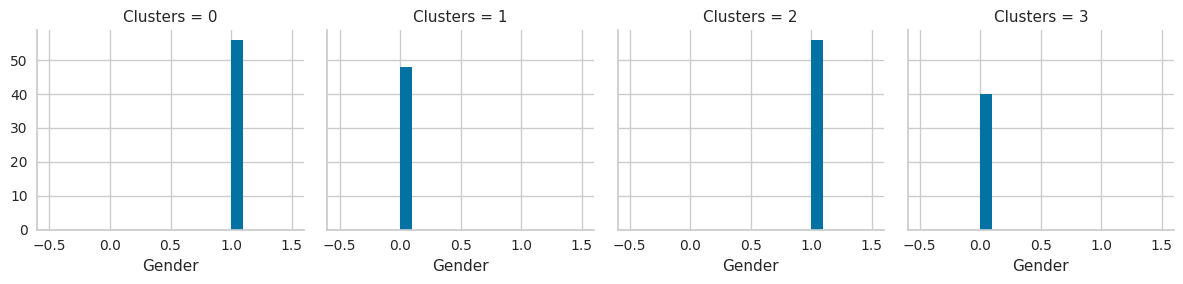

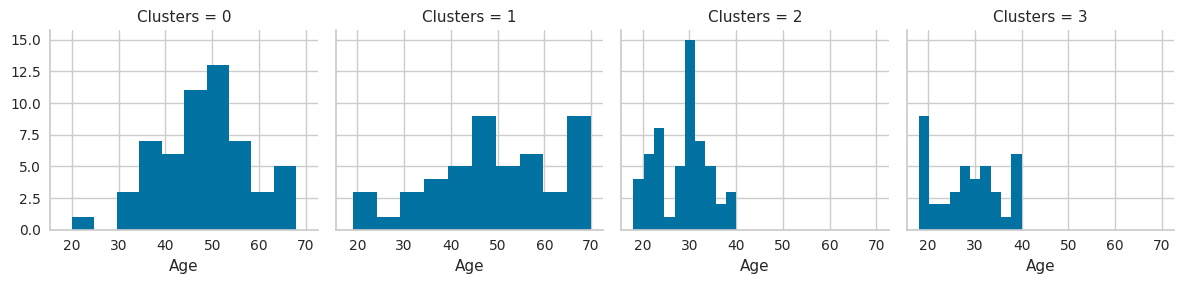

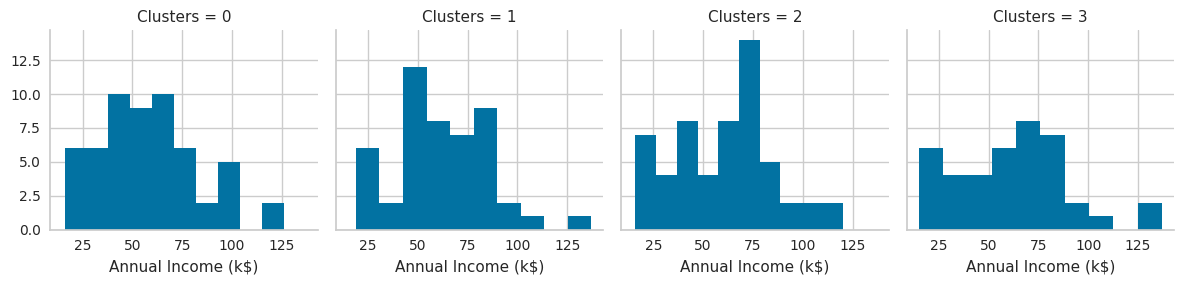

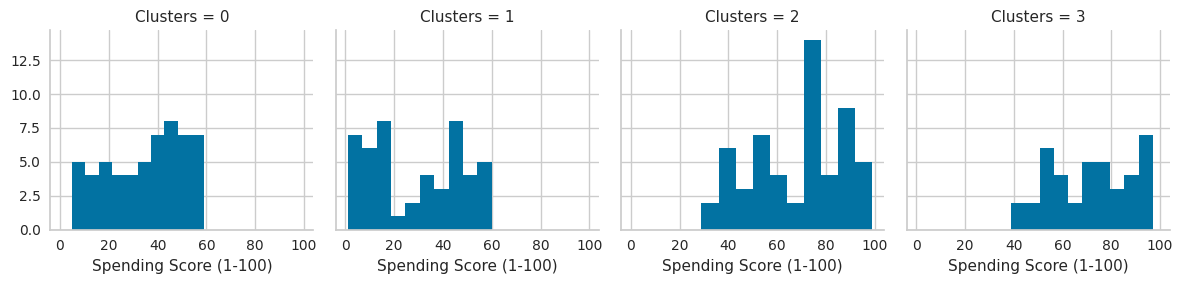

In [39]:
for c in cluster_df.drop(['Clusters' , 'CustomerID'] , axis =1) :
    grid = sns.FacetGrid(cluster_df , col = 'Clusters')
    grid = grid.map(plt.hist, c )
plt.show()

In [52]:
from sklearn.cluster import DBSCAN

# Create DBSCAN object
dbscan = DBSCAN(eps=0.5, min_samples=4)

# Fit and predict
labels_dbscan = dbscan.fit_predict(scaled_df)

# Add cluster labels to DataFrame
df_copy['Cluster_DBSCAN'] = labels_dbscan

# Display clusters
print(df_copy['Cluster_DBSCAN'].value_counts())


Cluster_DBSCAN
-1     76
 4     23
 5     20
 3     19
 8     18
 0      9
 6      7
 7      7
 1      5
 2      4
 9      4
 10     4
 11     4
Name: count, dtype: int64


In [53]:
pca_df_DBSCAN = pd.concat([pca_df , pd.DataFrame({'Clusters' :labels_dbscan })] , axis = 1 )

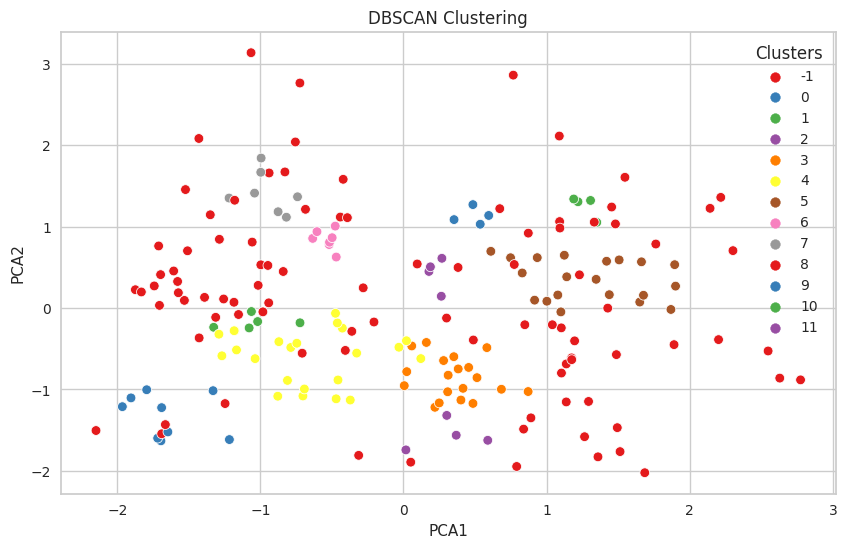

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Clusters', data=pca_df_DBSCAN, palette='Set1')
plt.title('DBSCAN Clustering')
plt.show()

In [55]:
from sklearn.cluster import AgglomerativeClustering

# Create Agglomerative clustering object
agg_clustering = AgglomerativeClustering(n_clusters=4)

# Fit and predict
labels_agg = agg_clustering.fit_predict(scaled_df)
pca_df_agglo =  pd.concat([pca_df , pd.DataFrame({'Clusters' :labels_agg })] , axis = 1 )



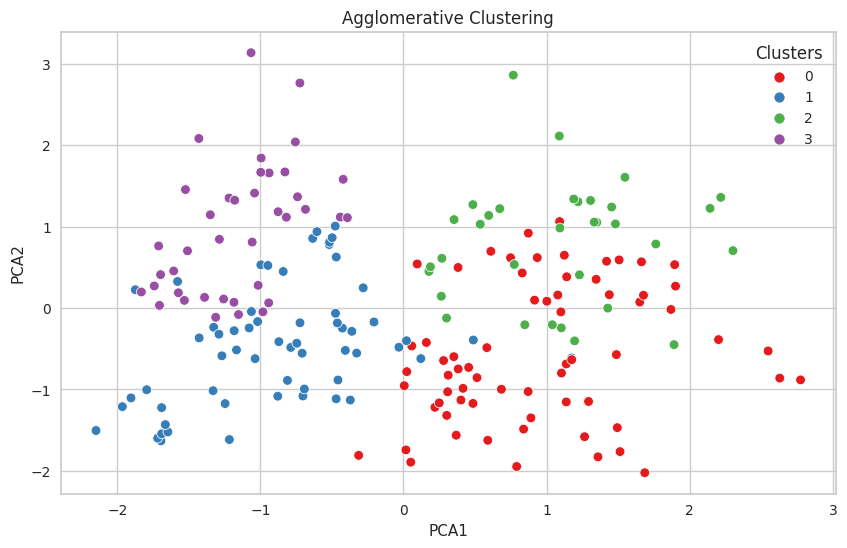

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Clusters', data=pca_df_agglo, palette='Set1')
plt.title('Agglomerative Clustering')
plt.show()

In [57]:
from sklearn.metrics import silhouette_score

# Evaluate DBSCAN
silhouette_dbscan = silhouette_score(scaled_df, labels_dbscan)
print("Silhouette Score for DBSCAN:", silhouette_dbscan)

# Evaluate Agglomerative clustering
silhouette_agg = silhouette_score(scaled_df, labels_agg)
print("Silhouette Score for Agglomerative clustering:", silhouette_agg)

Silhouette Score for DBSCAN: 0.12061976322280461
Silhouette Score for Agglomerative clustering: 0.26322605188202447


In [59]:
silhouette_agg = silhouette_score(scaled_df, kmeans_model_labels)
print("Silhouette Score for KMeans clustering:", silhouette_agg)

Silhouette Score for KMeans clustering: 0.30123231688013513


In [60]:
import joblib 
joblib.dump(kmeans_model , "kmeans.pkl" )

['kmeans.pkl']

In [61]:
cluster_df.to_csv('clustered_data.csv')

**Conclusion**

KMeans segmentation for Annual Income and Spending Score shown to be the most effective model, with significant cluster separation and good quality .

Agglomerative Clustering produced comparable results but lagged significantly behind KMeans in performance measurements.

DBSCAN demonstrated suboptimal cluster quality and separation, making it less suitable for this dataset.

As a result, for mall consumer segmentation, KMeans clustering based on Annual Income and Spending Score remains the recommended method due to its robust and interpretable results .